In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb

In [2]:
import matplotlib as mpl
from matplotlib import rc

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')

plt.rc('text', usetex=True)
plt.rc('font', size=11)

label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams.update({'font.size': label_size})

ftsize = 25

In [8]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
#pars.set_cosmology(H0=67.5, ombh2=0.022+0.122, omch2=0, mnu=0.06, omk=0, tau=0.06)

pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [9]:
#get data
data = camb.get_transfer_functions(pars)

In [10]:
print('Available variables are %s'%camb.model.evolve_names)

Available variables are ['k/h', 'delta_cdm', 'delta_baryon', 'delta_photon', 'delta_neutrino', 'delta_nu', 'delta_tot', 'delta_nonu', 'delta_tot_de', 'Weyl', 'v_newtonian_cdm', 'v_newtonian_baryon', 'v_baryon_cdm', 'a', 'etak', 'H', 'growth', 'v_photon', 'pi_photon', 'E_2', 'v_neutrino', 'T_source', 'E_source', 'lens_potential_source']


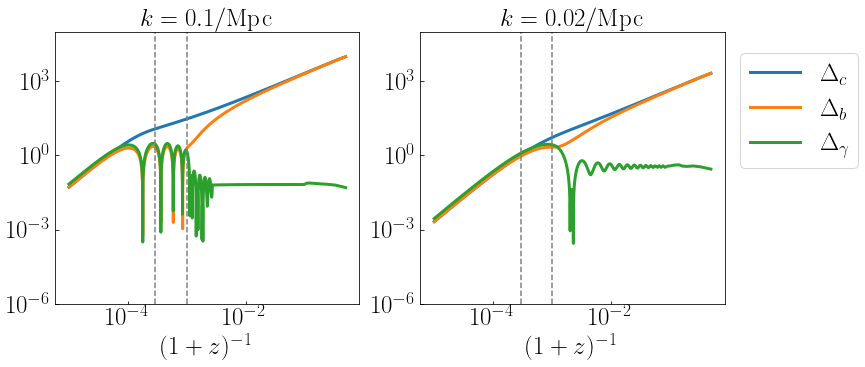

In [12]:
z = np.linspace(1,100000,100000)
z = z[::-1]

ks = [0.1,0.02]
ev = data.get_redshift_evolution(ks, z, ['delta_cdm','delta_baryon','delta_photon'])

_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    #ax.plot(1/(1+z),np.abs(ev[i,:, 0])/np.abs(ev[i,-1, 0]), lw=3)
    #ax.plot(1/(1+z),np.abs(ev[i,:, 1])/np.abs(ev[i,-1, 0]), lw=3)
    #ax.plot(1/(1+z),np.abs(ev[i,:, 2])/np.abs(ev[i,-1, 0]), lw=3)
    
    ax.plot(1/(1+z),np.abs(ev[i,:, 0]), lw=3)
    ax.plot(1/(1+z),np.abs(ev[i,:, 1]), lw=3)
    ax.plot(1/(1+z),np.abs(ev[i,:, 2]), lw=3)
    
    ax.set_title(r'$k= %s/\rm{Mpc}$'%ks[i], fontsize=ftsize)
    ax.set_xlabel('$(1+z)^{-1}$', fontsize=ftsize);
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    ax.axvline(1/(1+1000), linestyle='dashed', color = 'gray')
    ax.axvline(1/(1+3400), linestyle='dashed', color = 'gray')
    
    #ax.set_ylim(1e-7, 1e1)
    ax.set_ylim(1e-6, 1e5)
    
    ax.tick_params(axis='both', which='major', labelsize=ftsize)
    ax.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.legend([r'$\Delta_c$', r'$\Delta_b$', r'$\Delta_\gamma$'], loc = (1.05,0.5), fontsize=ftsize);

#plt.savefig('evolution_of_deltas_withDM.png', dpi = 300, bbox_inches='tight')
